# Agregación

* *60:00 min* | Última modificación: Agosto 11, 2021 | YouTube

In [1]:
import pandas as pd

In [2]:
%%writefile /tmp/data.csv
Vendor,Date,CarBrand,Color,Price,Code
KASPER B. ORTIZ,14.09.18,Dodge,indigo,"1184",1.0
Cheryl A. Kemp,25.01.20,Dongfeng Motor,violet,1379,2
Nita T. Gay,28.06.21,Renault,green,1591,5
Scarlet X. Stout,17.04.19,Ford,indigo,1901,1
Todd L. Richards,12.11.20,Tata Motors,indigo,1566,3
Philip Z. Pruitt,12.02.20,BMW,green,1440,4
Nita T. Gay,24.10.18,CHEVROLET,blue,1687,6
Kasper B. Ortiz,11.10.20,Buick,indigo,1894,2
Philip Z. Pruitt,22.01.19,Dacia,Violet,1858,6
Cheryl A. Kemp,21.11.18,Daimler,orange,1550,1
Todd L. Richards,28.04.19,LiCHEVROLETncoln,red,1606,2
cheryl a. kemp,28.05.20,Buick,red,1252,"1"
Kasper B. Ortiz,25.08.19,Volkswagen,violet,1468,9
Cheryl A. Kemp,28.11.20,Vauxhall,red,1339,8
Kasper B. Ortiz,16.03.21,Volkswagen,red,1618,9
Philip Z. Pruitt,17.03.21,Daimler,orange,1201,7
CHERYL A. KEMP,07.11.19,Isuzu,indigo,1280,6
NITA T. GAY,29.05.20,Hyundai Motors,orange,1849,7
Kasper B. Ortiz,13.02.20,Peugeot,Blue,1415,9
CHERYL A. KEMP,29.03.20,Maruti Suzuki,blue,1626,0
Kasper B. Ortiz,01.07.20,Mitsubishi Motors,blue,1120,1
NITA T. GAY,03.11.18,RAM Trucks,orange,1056,4
Kasper B. Ortiz,24.02.20,Kia Motors,orange,1375,3
Philip Z. Pruitt,14.05.20,Chevrolet,orange,1656,9
Kasper B. Ortiz,16.06.21,RAM Trucks,orange,1549,7
Kasper B. Ortiz,28.08.18,Kenworth,green,NONE,9
Philip Z. Pruitt,29.11.18,,orange,1469,4
Cheryl A. Kemp,01.10.18,GMC,orange,1087000,3

Overwriting /tmp/data.csv


In [7]:
#
# Carga de datos e inspección inicial
#
data = pd.read_csv(
    "/tmp/data.csv",
    parse_dates=['Date'],
)

#
# Conversión de tipos
#
data.Code = data.Code.astype(int)
data.Price = pd.to_numeric(data.Price, errors="coerce")


display(
    data.head(),
    "-" * 70,
    data.tail(),
)

Vendor       Date        CarBrand   Color   Price  Code
0   KASPER B. ORTIZ 2018-09-14           Dodge  indigo  1184.0     1
1    Cheryl A. Kemp 2020-01-25  Dongfeng Motor  violet  1379.0     2
2       Nita T. Gay 2021-06-28         Renault   green  1591.0     5
3  Scarlet X. Stout 2019-04-17            Ford  indigo  1901.0     1
4  Todd L. Richards 2020-12-11     Tata Motors  indigo  1566.0     3

'----------------------------------------------------------------------'

Vendor       Date    CarBrand   Color      Price  Code
23  Philip Z. Pruitt 2020-05-14   Chevrolet  orange     1656.0     9
24   Kasper B. Ortiz 2021-06-16  RAM Trucks  orange     1549.0     7
25   Kasper B. Ortiz 2018-08-28    Kenworth   green        NaN     9
26  Philip Z. Pruitt 2018-11-29         NaN  orange     1469.0     4
27    Cheryl A. Kemp 2018-01-10         GMC  orange  1087000.0     3

In [8]:
#
# Inspección directa de una columna
#
display(data.Vendor.min(), data.Vendor.max())

'CHERYL A. KEMP'

'cheryl a. kemp'

In [9]:
#
# Se observa mezcla de valores en mayuscula
# y minuscula
#
data.Vendor.sum()

'KASPER B. ORTIZCheryl A. KempNita T. GayScarlet X. StoutTodd L. RichardsPhilip Z. PruittNita T. GayKasper B. OrtizPhilip Z. PruittCheryl A. KempTodd L. Richardscheryl a. kempKasper B. OrtizCheryl A. KempKasper B. OrtizPhilip Z. PruittCHERYL A. KEMPNITA T. GAYKasper B. OrtizCHERYL A. KEMPKasper B. OrtizNITA T. GAYKasper B. OrtizPhilip Z. PruittKasper B. OrtizKasper B. OrtizPhilip Z. PruittCheryl A. Kemp'

In [6]:
display(data.Price.min(), data.Price.max())

'1056'

'NONE'

In [10]:
#
# Inspección de la suma de los campos
#
data.sum()

Vendor    KASPER B. ORTIZCheryl A. KempNita T. GayScarle...
Color     indigovioletgreenindigoindigogreenblueindigoVi...
Price                                           1.12593e+06
Code                                                    129
dtype: object

In [11]:
#
#
#
data.agg('min')

Vendor         CHERYL A. KEMP
Date      2018-01-10 00:00:00
Color                    Blue
Price                    1056
Code                        0
dtype: object

In [12]:
#
#
#
data.agg(['min', 'max'])

Vendor       Date   Color      Price  Code
min  CHERYL A. KEMP 2018-01-10    Blue     1056.0     0
max  cheryl a. kemp 2021-06-28  violet  1087000.0     9

In [13]:
data.agg(['min', 'max']).transpose()

min                  max
Vendor       CHERYL A. KEMP       cheryl a. kemp
Date    2018-01-10 00:00:00  2021-06-28 00:00:00
Color                  Blue               violet
Price                  1056            1.087e+06
Code                      0                    9

In [14]:
data.Vendor.value_counts()

Kasper B. Ortiz     8
Philip Z. Pruitt    5
Cheryl A. Kemp      4
CHERYL A. KEMP      2
Nita T. Gay         2
Todd L. Richards    2
NITA T. GAY         2
cheryl a. kemp      1
Scarlet X. Stout    1
KASPER B. ORTIZ     1
Name: Vendor, dtype: int64

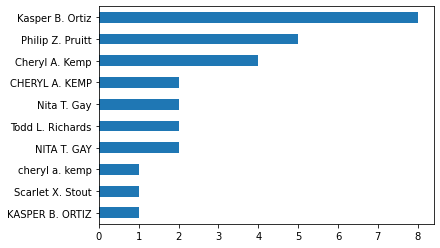

In [16]:
data.Vendor.value_counts(ascending=True).plot.barh()

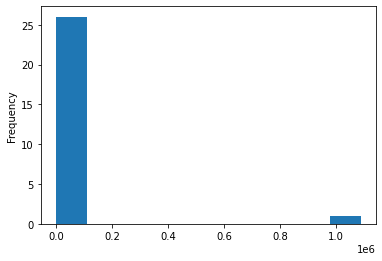

In [17]:
#
# Un histograma ayuda a dectectar la presencia de
# outliers
#
data.Price.plot.hist()

In [18]:
data.groupby('Vendor').transform('nunique')

Date  CarBrand  Color  Price  Code
0      1         1      1      1     1
1      4         4      3      4     4
2      2         2      2      2     2
3      1         1      1      1     1
4      2         2      2      2     2
5      5         4      3      5     4
6      2         2      2      2     2
7      8         7      7      7     5
8      5         4      3      5     4
9      4         4      3      4     4
10     2         2      2      2     2
11     1         1      1      1     1
12     8         7      7      7     5
13     4         4      3      4     4
14     8         7      7      7     5
15     5         4      3      5     4
16     2         2      2      2     2
17     2         2      1      2     2
18     8         7      7      7     5
19     2         2      2      2     2
20     8         7      7      7     5
21     2         2      1      2     2
22     8         7      7      7     5
23     5         4      3      5     4
24     8         7      7      7     5
25     8         7      7      7     5
26     5         4      3      5     4
27     4         4      3      4     4